# The Cournot Model

In this project we will analyze the traditionel Cournot model, known from lectures at the Micro 1,2 and 3. In a Cournot the firms competes in quantities thereby choosing the quantites taken into account the best response of the other firms to that quantity. Firstly, we will present the settings of the model. This is followed by an analytic and numerical solution of a setting where the firms have asymmetric cost functions. Then we will simplify the settings and analyze an analytical and numerical for a case with symmetric cost functions. Further we test how this simplified case is affected by the number of firms.

In [2]:
# autoreload modules when code is run
%reload_ext autoreload
%autoreload 2

# Importing useful packages
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

from ipywidgets import interact, interactive, fixed, interact_manual

import modelproject_B as mpy

# Er nedenstående nødvendige?
from numpy import array
from scipy import linalg
from scipy import optimize

# Sympy package helps writing  
sm.init_printing(use_unicode=True)

from sympy import *

## The setting of the model:

We examine a market with $N$ firms, whom produce the same homogenous good. Furthermore we assume that the aggregate demand of the good $x$ is linearly given by:
$$p(x)=c-x$$
Every firm $i$ has a costfunction given by:
$$C(x_i)=k*x_i^2$$ where the aggregate quantity in the market is given as:
$$x=\sum_{j=0}^N(x_j)$$

We then have that firm $i$ wish to maximize his profitfunction given by:
$$\underset{x_i}{max}: p(\sum_{j=0}^Nx_j)x_i)-C(x_i) =p(x)x_i-C(x_i)$$

So we have that firm $i$ is going to choose how much to produce given what the other firms in the market produces. It is intuitively that for  $N \rightarrow \infty$ 
this modelsetup describes the setting of perfect competition. Futhermore it is intuitive to imagine that for $N\rightarrow 1$ 
the setting describes a monopolistic competition situation. These two outer cases will be examized later in the project.

## Analytical Solution for 2 firms

We will now examine the analytical solution for only 2 firms  (A and B) competiting with assymetric cost functions. We assume that firm A has a cost function given by: $C_A=\frac{k}{2}*x_a^2$. The cost function of firm B is given by: $C_B=k*x_b^2$. 

In [23]:
# Defining the elements in the firms choice

a = sm.symbols('a')
b = sm.symbols('b')
qa, qb = sm.symbols('q_a q_b') 
k = sm.symbols('k')

In [24]:
# We start by defining the linear demand function:
def p_total(qa,qb,a,b):
    return (a-b*(qa+qb))

#Defining the cost function of firm A:
def c_A(qa,k):
    return ((k/2)*qa**2)

#Defining the cost function of firm B:
def c_B(qb,k):
    return (k*qb**2)

#The profitfunction of firm A:
def profit_A(qa,qb,a,b,k):
    return (p_total(qa,qb,a,b) * qa - c_A(qa,k))
    
#The profitfunction of firm B:
def profit_B(qa,qb,a,b,k):
    return (p_total(qa,qb,a,b) * qb - c_B(qb,k))

In [25]:
#We will now find the derivative, which we will use to find the best response functions

foc_a = diff(profit_A(qa,qb,a,b,k),qa)
foc_b = diff(profit_B(qa,qb,a,b,k),qb)
display(foc_a,foc_b)

In [26]:
#We find the best response functions by isolating respectively qa and qb in the above found derivatives
sola = sm.solve(sm.Eq(foc_a,0),qa)[0]
solb = sm.solve(sm.Eq(foc_b,0),qb)[0]

print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )


 Firm A's best response is given by: q_a = (a - b*q_b)/(2*b + k) and firm B's best response is given by: q_b =(a - b*q_a)/(2*(b + k))


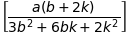

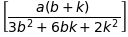

In [27]:
#To find the quantity firm A wants to produce we substitute firm B's best response function into firm A's best reponse and then solve for q_a 
sola_subs = foc_a.subs(qb,solb) #substituting the best response function of firm B into the FOC of firm A
q_astar = solve(sola_subs,qa) #Solving for q_a

solb_subs = foc_b.subs(qa,sola) #substituting the best response function of firm A into the FOC of firm B
q_bstar = solve(solb_subs,qb) #Solving for q_b

display (q_astar, q_bstar) #Showing the optimal quantities


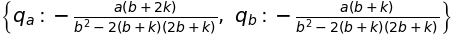

In [28]:
#Here we find the optimal quantities for both firms with another code. The result is identical with the result above. Here we just use that we can solve 2 equation with 2 unknowns.

solve([foc_a, foc_b], [qa, qb]) #solving 2 equations with 2 unknowns 

In [29]:
#We are now able to find the prices the firms will take for the good and the profit each firm get:

#As the above quantities is given as lists we start by defining/converting the list into a float:
type(q_astar)
qqa=q_astar[0]
qqb=q_bstar[0]

#We can now find the price of the good:
print("\n The price of the good: " + str(p_total(qqa,qqb,a,b)) ) 

#We can now find the profit of each firm:
print("\n The profit of A: " + str(simplify(profit_A(qqa,qqb,a,b,k))))
print("\n The profit of B: " + str(simplify(profit_B(qqa,qqb,a,b,k))))


 The price of the good: a - b*(a*(b + k)/(3*b**2 + 6*b*k + 2*k**2) + a*(b + 2*k)/(3*b**2 + 6*b*k + 2*k**2))

 The profit of A: a**2*(b + 2*k)*(6*b**2 + 12*b*k - 2*b*(2*b + 3*k) + 4*k**2 - k*(b + 2*k))/(2*(3*b**2 + 6*b*k + 2*k**2)**2)

 The profit of B: a**2*(b + k)*(3*b**2 + 6*b*k - b*(2*b + 3*k) + 2*k**2 - k*(b + k))/(3*b**2 + 6*b*k + 2*k**2)**2


## Numerical example

We will now examine the above 2 firm case, where we assume that $a=50$. Furthermore we assume that $k=3$ and $b=1$.

In [38]:
#We start by setting the values:
a=50
b=1
k=3

#The derivative:
foc_a = diff(profit_A(qa,qb,a,b,k),qa)
foc_b = diff(profit_B(qa,qb,a,b,k),qb)
display(foc_a,foc_b)

#The best responsefunctions 
sola= sm.solve(sm.Eq(foc_a,0),qa)[0]
solb= sm.solve(sm.Eq(foc_b,0),qb)[0]
print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )

#We can now calculate the quantity firm A and B wants to produce, using the best response functions. We use the simpler code from above 
solve([foc_a, foc_b], [qa, qb])



 Firm A's best response is given by: q_a = 10.0 - 0.2*q_b and firm B's best response is given by: q_b =25/4 - q_a/8


In [39]:
#As the above quantities os given as lists we start by defining/converting the list into a float:
type(q_astar)
qqa=q_astar[0]
qqb=q_bstar[0]
#We can now find the price of the good:
print("\n The price of the good: " + str(p_total(qqa,qqb,a,b)) ) 

#We can now find the profit of each firm:
print("\n The profit of firm A: $\Pi$ = " + str(profit_A(qqa,qqb,a,b,k)) + " and firm B's best response is given by: \Pi =" + str(profit_B(qqa,qqb,a,b,k)) )


 The price of the good: -a*(b + k)/(3*b**2 + 6*b*k + 2*k**2) - a*(b + 2*k)/(3*b**2 + 6*b*k + 2*k**2) + 50

 The profit of firm A: $\Pi$ = -1.5*a**2*(b + 2*k)**2/(3*b**2 + 6*b*k + 2*k**2)**2 + a*(b + 2*k)*(-a*(b + k)/(3*b**2 + 6*b*k + 2*k**2) - a*(b + 2*k)/(3*b**2 + 6*b*k + 2*k**2) + 50)/(3*b**2 + 6*b*k + 2*k**2) and firm B's best response is given by: \Pi =-3*a**2*(b + k)**2/(3*b**2 + 6*b*k + 2*k**2)**2 + a*(b + k)*(-a*(b + k)/(3*b**2 + 6*b*k + 2*k**2) - a*(b + 2*k)/(3*b**2 + 6*b*k + 2*k**2) + 50)/(3*b**2 + 6*b*k + 2*k**2)



 The kink point is the optimal quantities. For firm A: a*(b + 2*k)/(3*b**2 + 6*b*k + 2*k**2)and for firm B:a*(b + k)/(3*b**2 + 6*b*k + 2*k**2)


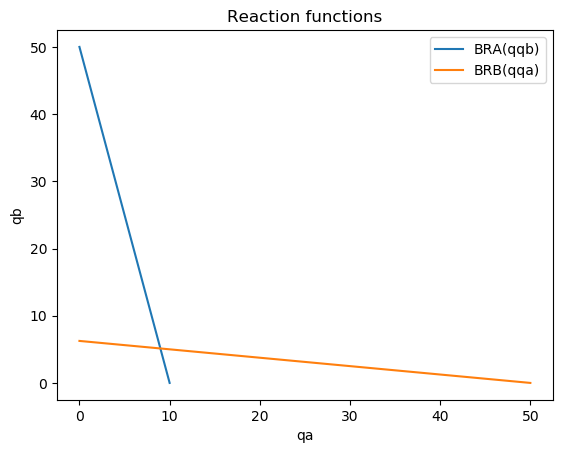

In [32]:
# Plot the two best response functions (bemærk det er egne beregninger. Kan ikke huske hvad der skal inverteres og sådan noget for at man kan lave det grafisk. Men de burde passe)

plt.plot([0,6,10],[50,20,0], label = 'BRA(qqb)')
plt.plot([0,10,50],[25/4,5,0], label = 'BRB(qqa)')
plt.legend()
plt.xlabel('qa')
plt.ylabel('qb')
plt.title('Reaction functions')

print("\n The kink point is the optimal quantities. For firm A: " + str(qqa) + "and for firm B:" + str(qqb)) 


## Analytical Solution 

We will now show the numerical solution for two firms with symmetric cost functions. This is done by using the functions from modelproject.py. 

In [14]:
#We start by finding the analytics solution for firm i under symmetric cost function
k = sm.symbols('k')
a = sm.symbols('a')
b = sm.symbols('b')
N= sm.symbols('n') # Number of firms 
qi = sm.symbols('q_i') #quantity of the N firm 

Solution = mpy.solution_cournot(N,a,b,k)
print('\n The total quantity is: ' + str(Solution[0]))
print('\n The price is: ' + str(Solution[1]))
print('\n The quantity for firm i is: ' + str(Solution[2]))
print('\n The the profit for firm i is: ' + str(Solution[3]))  



 The total quantity is: n*(a - k)/(b*(n + 1))

 The price is: a - n*(a - k)/(n + 1)

 The quantity for firm i is: (a - k)/(b*(n + 1))

 The the profit for firm i is: (a**2 - 2*a*k + k**2)/(b*(n**2 + 2*n + 1))


## Numerical Solution 

We will now solve the above example numeric using the same functions defined i modelproject.py.

In [22]:
#We start by setting the values:
a = 20
b = 1
k = 1
N = 2 # Number of firms 

#qi = sm.symbols('q_i') #quantity of the i firm 


Solution = mpy.solution_cournot(N,a,b,k)
pcquantity = mpy.perfect_com(qi,N,a,b,k)
print('\n The total quantity is: ' + str(round(Solution[0],2)))
print('\n The price is: ' + str(round(Solution[1],2)))
print('\n The quantity for firm i is: ' + str(round(Solution[2],2)))
print('\n The the profit for firm i is: ' + str(round(Solution[3],2)))  
print('\n The quantity for perfect competition: ' + str(round(pcquantity[0])))

"""
Har leget med at tilføje widgets men det giver nok ikke så meget mening her
widgets.interact(mpy.solution_cournot,
    N = widgets.IntSlider(description="$Number of firms$",min=1,max=100),
    a = a,
    b = b,
    k = k
) 
"""



#loss = mpy.plot_deadweight_loss(N,a,b,k)

widgets.interact(mpy.plot_deadweight_loss,
    N = widgets.IntSlider(description="$Number of firms$",min=1,max=100),
    a = a,
    b = b,
    k = k
) 


 The total quantity is: 12.67

 The price is: 7.33

 The quantity for firm i is: 6.33

 The the profit for firm i is: 40.11

 The quantity for perfect competition: 19


interactive(children=(IntSlider(value=1, description='$Number of firms$', min=1), IntSlider(value=20, descript…

<function modelproject_B.plot_deadweight_loss(N, a, b, k)>

# Conclusion